In [1]:
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression, LogisticRegression,
    SGDClassifier, SGDRegressor
)
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB,
    CategoricalNB, ComplementNB
)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error, mean_absolute_error,
    roc_curve, roc_auc_score, precision_recall_curve,
    auc
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut
)
from sklearn.datasets import (
    make_classification, load_breast_cancer, load_iris, load_diabetes
)

from mlxtend.plotting import plot_decision_regions
from yellowbrick.classifier import DiscriminationThreshold, ROCAUC

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X.shape, y.shape

((1000, 20), (1000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
X_train.shape, X_test.shape

((500, 20), (500, 20))

In [5]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba.shape

(500, 2)

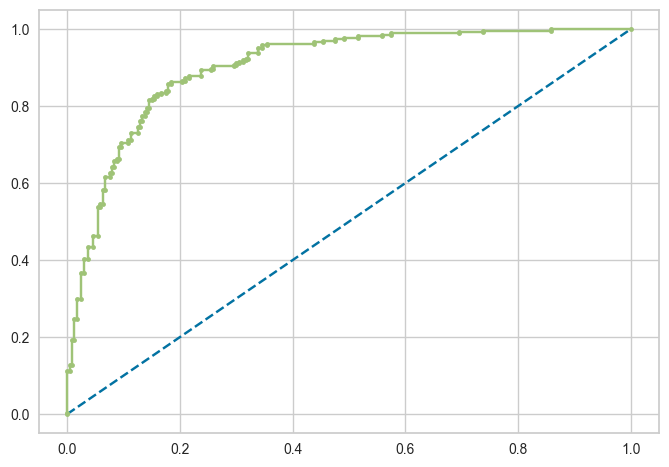

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [7]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9027724358974359

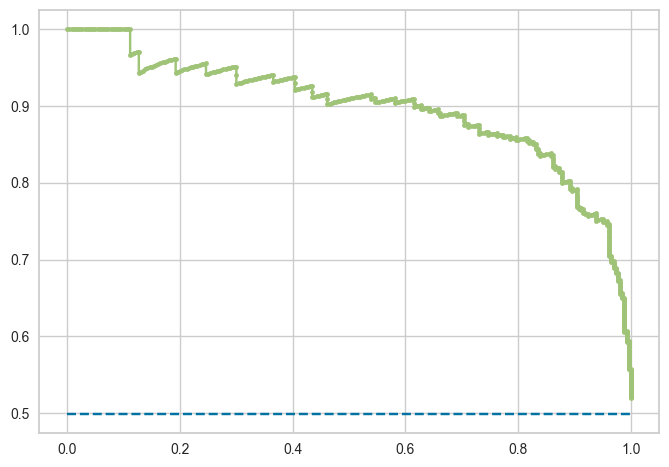

In [8]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [9]:
auc(recall, precision)

0.897662372903334

In [10]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



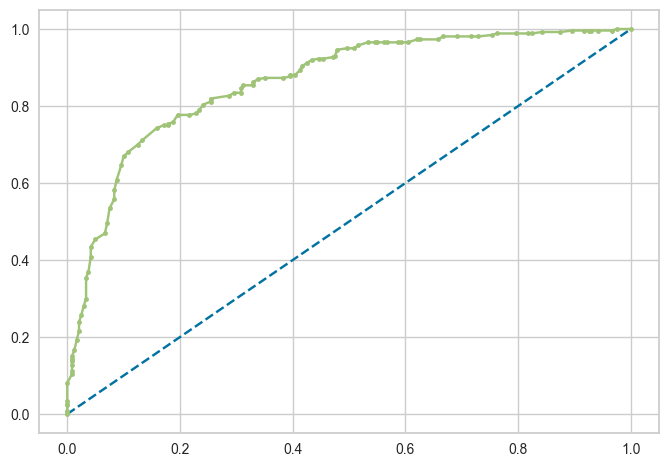

In [11]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [12]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [13]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X.shape, y.shape

((1000, 20), (1000,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [16]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



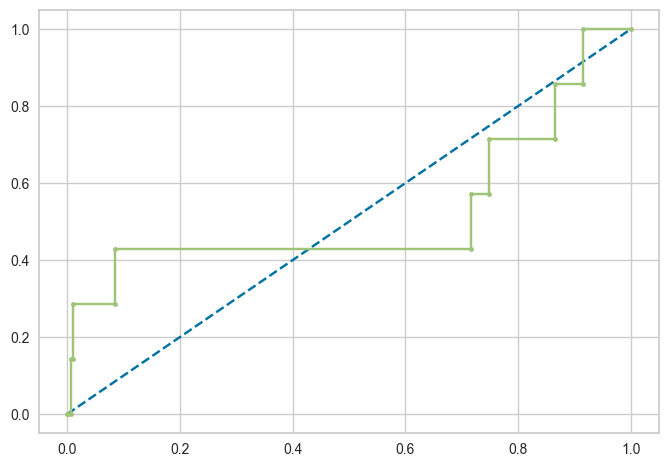

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

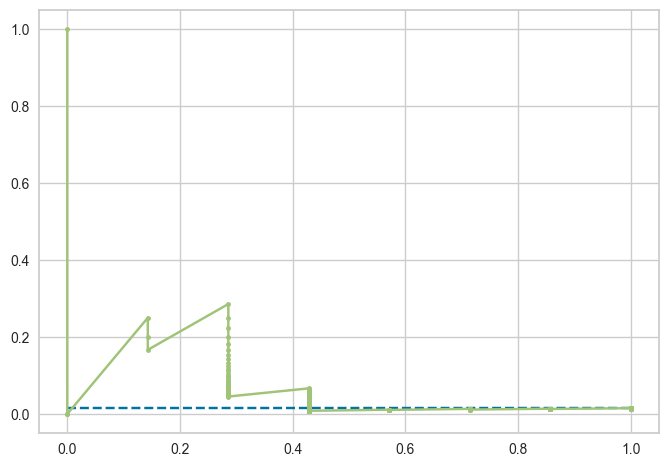

In [18]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

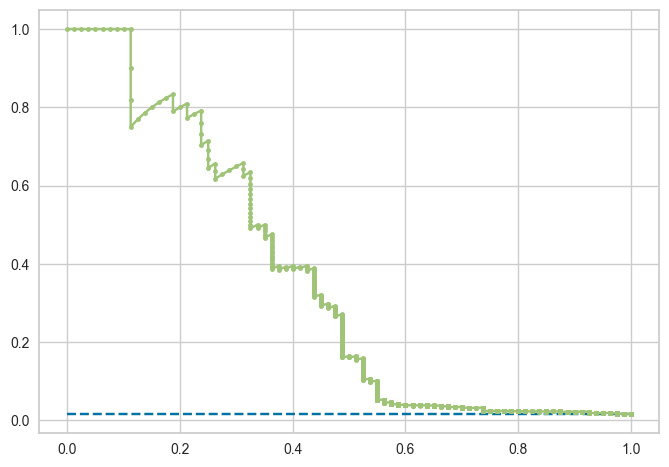

In [19]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [20]:
f1 = (2 * p * r) / (p + r)
ix = np.argmax(f1)
pr_thresholds[ix]

0.20351400268372405

In [21]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.203514, F-Score=0.430


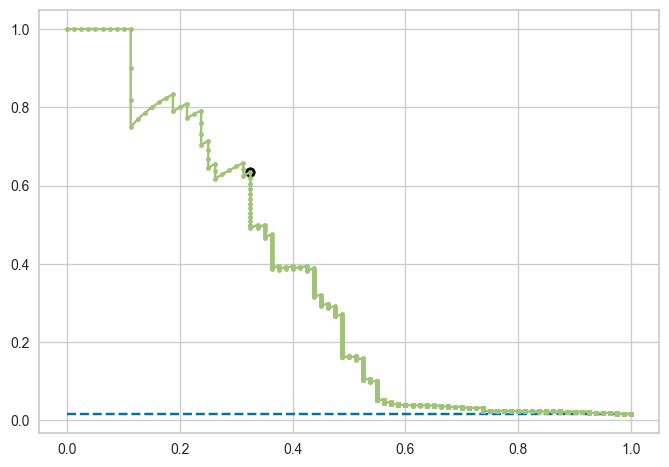

In [22]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [23]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.62      0.31      0.42        80

    accuracy                           0.99      5000
   macro avg       0.81      0.65      0.70      5000
weighted avg       0.98      0.99      0.98      5000



In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.81      0.16      0.27        80

    accuracy                           0.99      5000
   macro avg       0.90      0.58      0.63      5000
weighted avg       0.98      0.99      0.98      5000



## Задания для самостоятельного выполнения
#### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [25]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
X.shape, y.shape

((1000, 2), (1000,))

In [26]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba.shape

(500, 2)

0.9939996159754224


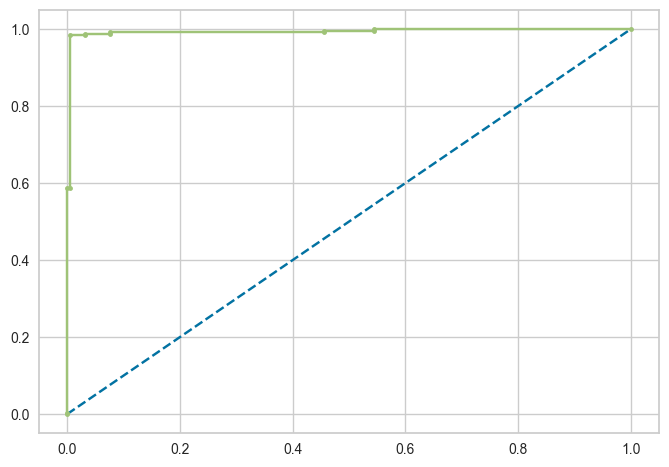

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

0.994938023084143


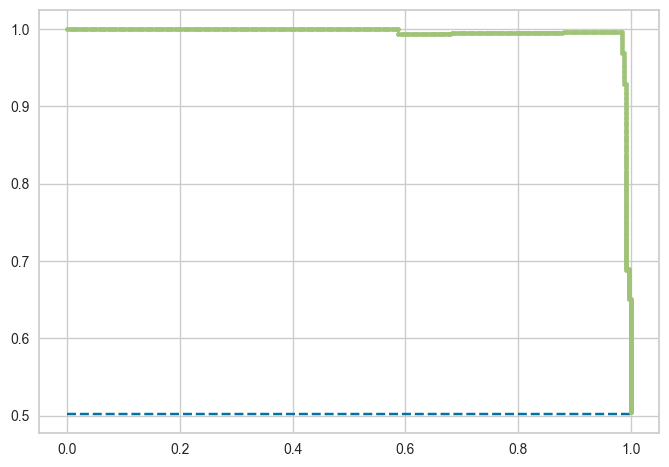

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
pr_auc = auc(recall, precision)
print(pr_auc)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

#### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [29]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [30]:
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

0.9848311688311688


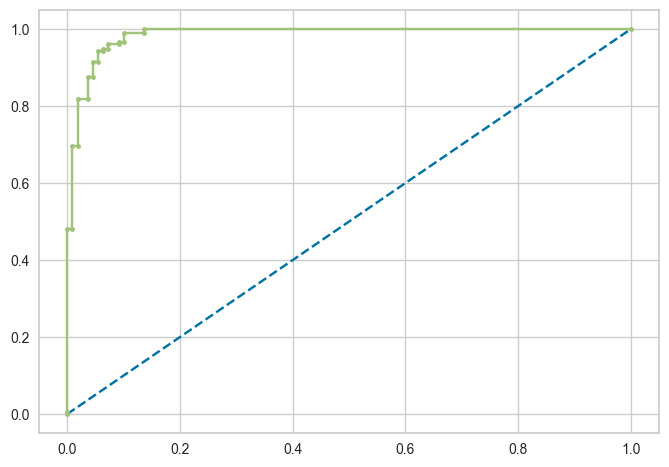

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

0.9889768860157323


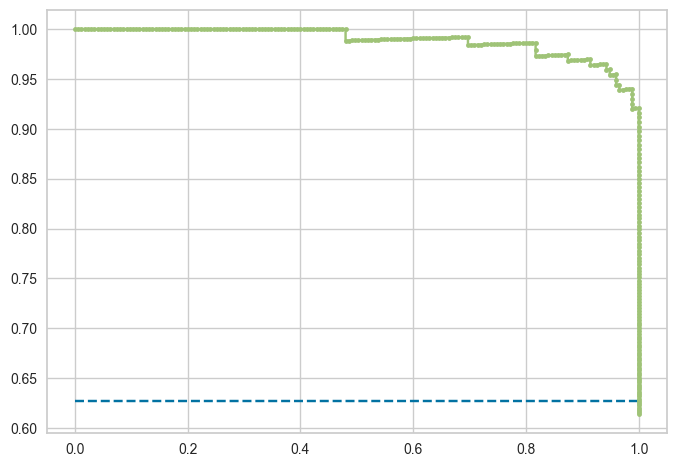

In [32]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
no_skill = len(y[y==1]) / len(y)
pr_auc = auc(recall, precision)
print(pr_auc)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

• ROC AUC близок к 1, значит модель обладает хорошо различает классы. Высокое значение PR AUC подтверждает эффективность модели в условиях несбалансированных классов.

#### 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [60]:
X, y = make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [61]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:, 1])
ix = np.argmax(np.sqrt(tpr * (1 - fpr)))
optimal_threshold_roc = thresholds_roc[ix]
optimal_threshold_roc, fpr[ix], tpr[ix]

(0.3939801269224649, 0.08906882591093117, 0.9802371541501976)

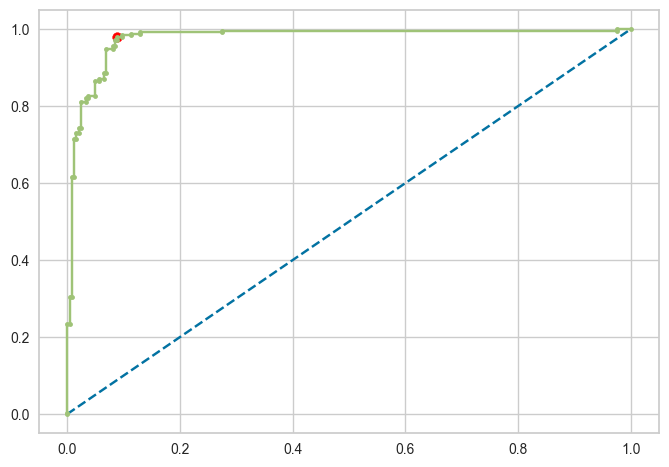

In [62]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red')
plt.show()

#### 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

In [70]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

0.0008586778250354803
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       247
           1       0.65      1.00      0.79       253

    accuracy                           0.73       500
   macro avg       0.82      0.73      0.71       500
weighted avg       0.82      0.73      0.71       500



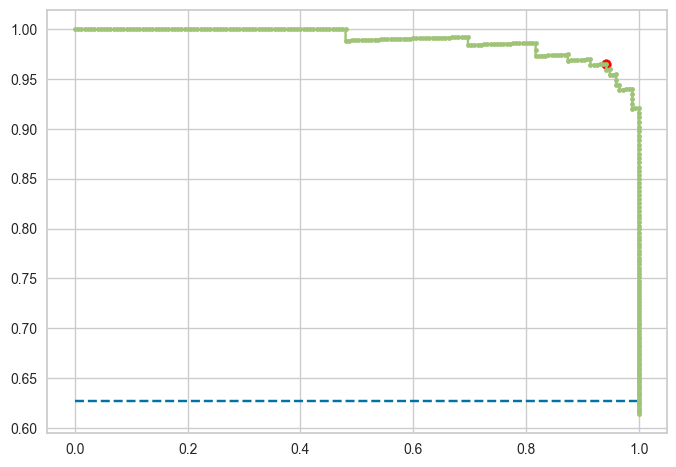

In [72]:
beta = 0.5

f_precision = ((1 + beta**2) * precision * recall) / (beta**2 * precision + recall)
ix = np.argmax(f_precision)
print(pr_thresholds[ix])
print(classification_report(y_test, (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int'), zero_division=0))

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], marker='o', color='red')
plt.show()

0.00040604070788900824
              precision    recall  f1-score   support

           0       0.99      0.38      0.55       247
           1       0.62      1.00      0.77       253

    accuracy                           0.69       500
   macro avg       0.81      0.69      0.66       500
weighted avg       0.80      0.69      0.66       500



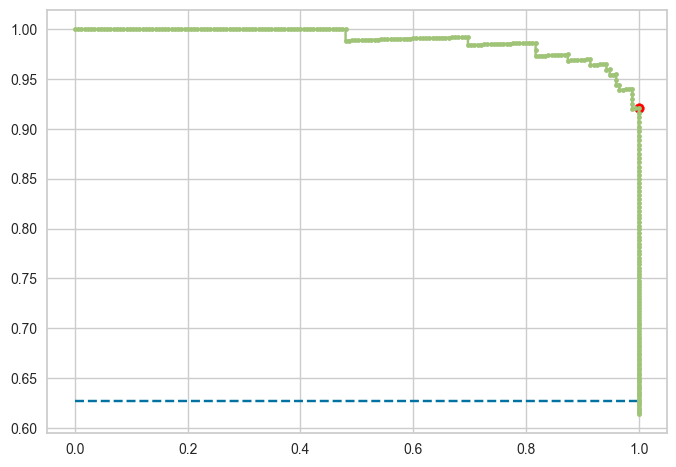

In [73]:
beta = 1.5

f_precision = ((1 + beta**2) * precision * recall) / (beta**2 * precision + recall)
ix = np.argmax(f_precision)
print(pr_thresholds[ix])
print(classification_report(y_test, (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int'), zero_division=0))

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], marker='o', color='red')
plt.show()

#### 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

In [42]:
X, y = make_classification(n_samples=1000, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

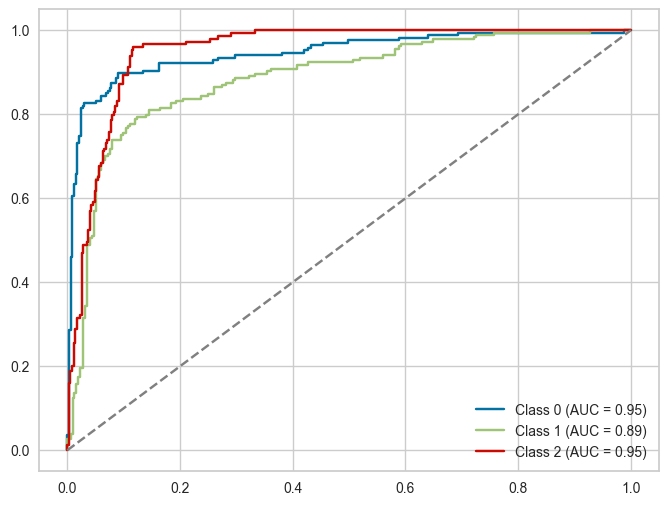

In [43]:
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.grid(True)
plt.legend()
plt.show()

#### 6. Используйте для построения кривых библиотеку yellowbrick.

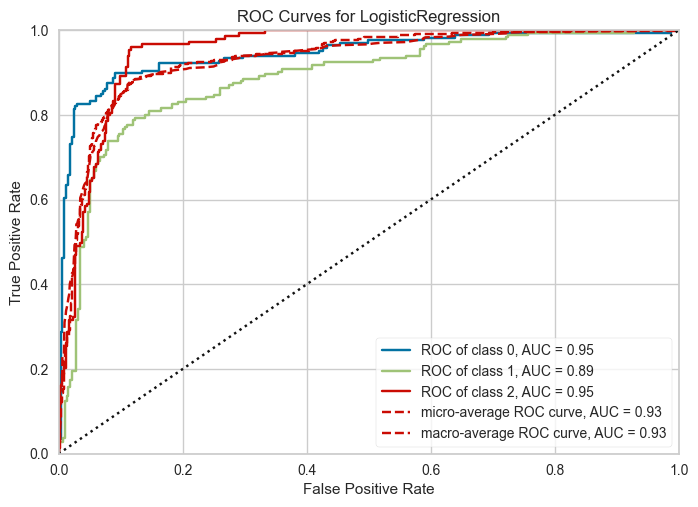

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
visualizer = ROCAUC(model, classes=model.classes_)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()